In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns;
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense,BatchNormalization,Dropout,Input
from keras.models import Sequential, Model
from keras.layers import Conv2D
from tensorflow.keras import datasets, layers, models
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from sklearn.metrics import plot_confusion_matrix ,classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

In [2]:
np.random.seed = 42

In [3]:
train_path = './sign_mnist_train.csv'
test_path = './sign_mnist_test.csv'

In [4]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [5]:
# train.head

<AxesSubplot:>

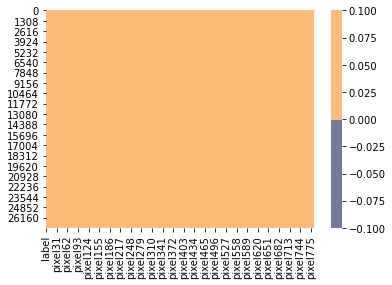

In [6]:
cols =train.columns
colours = ['#747BA1', '#FFBA77'] # specify the orange  - yellow is missing. blue is not missing.
sns.heatmap(train[cols].isnull(), cmap=sns.color_palette(colours))

<AxesSubplot:>

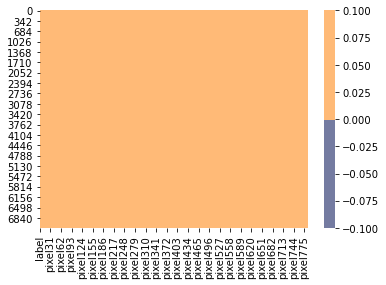

In [7]:
cols =test.columns
colours = ['#747BA1', '#FFBA77'] # specify the orange  - yellow is missing. blue is not missing.
sns.heatmap(test[cols].isnull(), cmap=sns.color_palette(colours))

In [8]:
train.isna().sum().sort_values(ascending=True)

label       0
pixel517    0
pixel518    0
pixel519    0
pixel520    0
           ..
pixel264    0
pixel265    0
pixel266    0
pixel268    0
pixel784    0
Length: 785, dtype: int64

In [9]:
test.isna().sum().sort_values(ascending=True)

label       0
pixel517    0
pixel518    0
pixel519    0
pixel520    0
           ..
pixel264    0
pixel265    0
pixel266    0
pixel268    0
pixel784    0
Length: 785, dtype: int64

In [10]:
train = train.drop_duplicates()
test  = test.drop_duplicates()

In [11]:
print(train.shape)
print(test.shape)
# plt.imshow(train[0])
train

(27455, 785)
(7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [12]:
label = train['label']
train = train.drop(['label'],axis=1)

In [13]:
test_label = test['label']
test = test.drop(['label'],axis=1)

In [74]:
# print(train.shape)
# print(test.shape)
# print(label.shape)
# print(test_label.shape)
test[0].shape

(28, 28, 1)

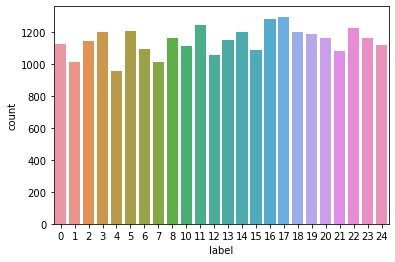

In [15]:
sns.countplot(x= label)
plt.show()

In [19]:
train = train /255
test  = test /255

In [73]:
test

array([[[[0.00229143],
         [0.00229143],
         [0.00230681],
         ...,
         [0.00230681],
         [0.00230681],
         [0.00229143]],

        [[0.00230681],
         [0.00230681],
         [0.00230681],
         ...,
         [0.00232218],
         [0.00230681],
         [0.00232218]],

        [[0.00230681],
         [0.00232218],
         [0.00232218],
         ...,
         [0.00232218],
         [0.00232218],
         [0.00233756]],

        ...,

        [[0.00106113],
         [0.00106113],
         [0.00118416],
         ...,
         [0.00178393],
         [0.00173779],
         [0.00181469]],

        [[0.00113802],
         [0.0011534 ],
         [0.00116878],
         ...,
         [0.00169166],
         [0.00178393],
         [0.00173779]],

        [[0.0011534 ],
         [0.00113802],
         [0.00113802],
         ...,
         [0.00172241],
         [0.00184544],
         [0.00164552]]],


       [[[0.00193772],
         [0.00196847],
         [0.00

In [23]:
train = np.array(train)
test  = np.array(test)

In [35]:
test.shape[0]

7172

In [46]:
# train.shape[0]
train = train.reshape(train.shape[0],28,28,1)
test  = test.reshape(test.shape[0],28,28,1)

In [48]:
test.shape

(7172, 28, 28, 1)

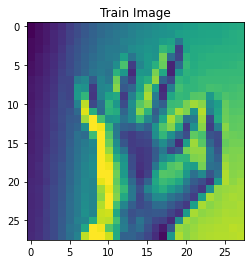

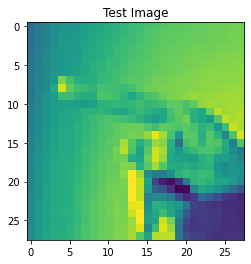

In [27]:
image_x = random.randint(0,len(test))
plt.imshow(np.reshape(train[image_x],(28,28)))
plt.title('Train Image')
plt.show()
plt.imshow(np.reshape(test[image_x],(28,28)))
plt.title('Test Image')
plt.show()

In [28]:
model = models.Sequential()
model.add(layers.Conv2D(64,(3,3),padding ='Same',activation = 'relu',input_shape=(28,28,1)))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(layers.Conv2D(128,(3,3),padding ='same',activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(layers.Conv2D(128,(3,3),padding ='same',activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2,2))

In [29]:
print(model)

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 dropout (Dropout)           (None, 28, 28, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       7

In [31]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(25, activation ='softmax'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 dropout (Dropout)           (None, 28, 28, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       7

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [34]:
history = model.fit(train,label,epochs=10,validation_data=(test,test_label))

Epoch 1/10


C:\Users\Ravi\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


858/858 [==============================] - 221s 255ms/step - loss: 1.0247 - accuracy: 0.6753 - val_loss: 12.5117 - val_accuracy: 0.1001
Epoch 2/10
858/858 [==============================] - 226s 263ms/step - loss: 0.1161 - accuracy: 0.9612 - val_loss: 13.4541 - val_accuracy: 0.0789
Epoch 3/10
858/858 [==============================] - 246s 286ms/step - loss: 0.1047 - accuracy: 0.9642 - val_loss: 2.9543 - val_accuracy: 0.5414
Epoch 4/10
858/858 [==============================] - 217s 253ms/step - loss: 0.0559 - accuracy: 0.9821 - val_loss: 4.0859 - val_accuracy: 0.3390
Epoch 5/10
858/858 [==============================] - 223s 261ms/step - loss: 0.0622 - accuracy: 0.9794 - val_loss: 3.1110 - val_accuracy: 0.4519
Epoch 6/10
858/858 [==============================] - 190s 222ms/step - loss: 0.1407 - accuracy: 0.9548 - val_loss: 4.4602 - val_accuracy: 0.4110
Epoch 7/10
858/858 [==============================] - 184s 215ms/step - loss: 0.1039 - accuracy: 0.9656 - val_loss: 0.3040 - val_accu

In [65]:
model.evaluate(test, test_label)


225/225 [==============================] - 8s 37ms/step - loss: 0.7232 - accuracy: 0.8590


[0.7231913208961487, 0.8590351343154907]

In [52]:
predictions = model.predict(test)
predictions = np.argmax(predictions, axis = 1)
predictions[5]

21

In [53]:
loaded_model = tf.keras.models.load_model("sign.h5")
loaded_model.build()
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 dropout (Dropout)           (None, 28, 28, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       7

In [76]:
predictions = loaded_model.predict([test[0]])
# predictions = np.argmax(predictions, axis = 1)
# result = predictions[90]
# result

ValueError: in user code:

    File "C:\Users\Ravi\anaconda3\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Ravi\anaconda3\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Ravi\anaconda3\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Ravi\anaconda3\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "C:\Users\Ravi\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer "max_pooling2d" (type MaxPooling2D).
    
    Negative dimension size caused by subtracting 2 from 1 for '{{node sequential/max_pooling2d/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](sequential/batch_normalization/FusedBatchNormV3)' with input shapes: [?,28,1,64].
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 28, 1, 64), dtype=float32)


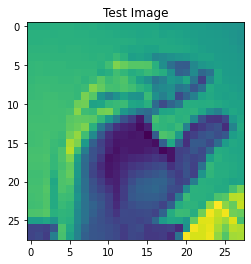

In [69]:
plt.imshow(np.reshape(test[108],(28,28)))
plt.title('Test Image')
plt.show()

225/225 - 18s - loss: 0.1642 - accuracy: 0.9625 - 18s/epoch - 80ms/step


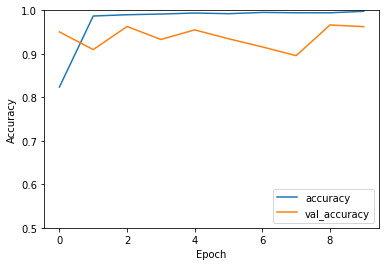

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test,  test_label, verbose=2)